# Pluto Example Notebook

Hi there,

this jupyter notebook should give you a basic overview of how to use Pluto, how it work's behide the scenes, and what to expect in future versions.

Pluto is a libaray for working with and analysing screenshots. The core idea is to extract usefull information from a screenshot and to return that information in a machine-searchable format like JSON. In order to facilitate that task, Pluto also provides additional helper features that can be used individually for other purposes, or to build custom tools. More on that later.

In recent versions, Pluto was based around a classification approach. In the newest version, the v1.0.0 release, I'm introducing a new approach based around object-detection that will be the focus going forward. Pluto uses a modified YOLOv5 object-detection model called [YOLOv5-slim](https://github.com/Patzold/yolov5-slim).

Prerequisite: download ```pluto.py``` and the ```models``` folder, put them both in the same directory as this file.  

<pre>
/base_dir  
 |-- pluto.py
 |-- /models  
 |    |-- profile_pic.pt  
 |    |-- text_row.pt  
 |     ...  
 |  
 |-- example.ipynb     <-- your are here  
</pre>
If not done already, install the dependencies for Pluto and YOLOv5 (see below). Perhaps you might want to create a virtual environment first, see: [Python environments](https://code.visualstudio.com/docs/python/environments)

In addition to that, you might want to download some example images from the [GitHub repo](https://github.com/Patzold/Pluto) or the [screenshots dataset](https://www.kaggle.com/patzold/screenshots-dataset).

In [ ]:
!pip install -r requirements.txt

In [1]:
import pluto as pl

# check if you're running cuda
print(pl.determine_device())

cuda


Let's start by loading a screenshot and displaying it.

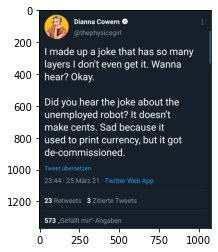

In [2]:
path = "example_images/1.jpg" # This image is from the Pluto GitHub repo
img = pl.read_image(path)
pl.show_image(img)

Next, let's run the core method for the category specific feature. All features like the Facebook, New York Times or FB Messengeer one have a to_json() method. It performes the core function of Pluto, which is to extract information from a screenshot and to return it as a JSON file. Currently only the Twitter Feature uses the new object-detection based approch, and it's still limited to screenshots with the dark backgroud color. This limitation will be gone with future updates.

In [3]:
tweet = pl.Twitter(img)
tweet.to_json()

'{"source": "Twitter", "category": "Social Media", "tweet": {"user": {"handle": "thephysicsgirl", "username": "Dianna Cowern "}, "text": "made up a joke that has so many layers I don\'t even get it. Wanna hear? Okay: Did you hear the joke about the unemployed robot? It doesnt make cents. Sad because it used to print currency, but it got de-commissioned: Tweet ubersetzen", "engagement": {"retweets": "23"}}}'

In the example above, we don't specify a specific image nor output path, so the image from the object initialization (or last used image) is used and the output is simply printed.

Let's perform the same action, but this time with a different image (and the same object) and a specified output path.

In [4]:
img = pl.read_image("example_images/0.jpg")
tweet.to_json(img, "tweet_data.json")

Check your directory. You should find a file called "tweet_data.json". Let's go a step further with some advanced use cases.

### Batch Inference & Model Loading Optimization

Some of the longest operations when working with Pluto is the loading of the object-detection models. Especially when working with many images or different Pluto objects, loadings are the main source of waiting times. To optimize the loading process, Pluto can store loaded models in a seperate object. This way, models only need to be loaded once and can be used multiple times throughout a script (or a notebook). Let's have a look:

In [5]:
detcs = pl.Detectors()

print(detcs)

--- Detector ---
models loaded:
  [none]


If we pass the detector object at initialisation of the tweet, all required models will be loaded automatically and stored inside the detector object.

In [6]:
tweet = pl.Twitter(img, detcs)

print(detcs)

--- Detector ---
models loaded:
  -> profile_pic - <class 'models.common.AutoShape'>
  -> text_row - <class 'models.common.AutoShape'>
  -> words - <class 'models.common.AutoShape'>


In [7]:
tweet.to_json(img)

'{"source": "Twitter", "category": "Social Media", "tweet": {"user": {"handle": "Queen_Europe", "username": "Angela Merkel "}, "text": "Ican assure you that my departure from office is going to be very boring: Tweet ubersetzen", "engagement": {"retweets": "6k"}}}'

By default, every twitter object creates its own detector storage. But when using multiple objects, potentially of different types (coming in future versions...), having central storage for loaded models will dramatically increase execution times.

But let's take a closer look at the detection models themself.

### Detection Models

Pluto has multiple detection models for recognizing the different parts of a screenshot. We can see this in action using a visualization of the last to_json() method call results.

d:\Pluto\pluto.py:88: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


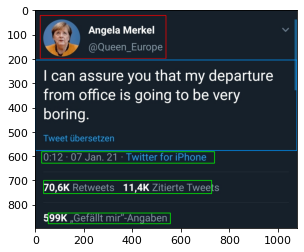

In [8]:
pl.show_image(tweet.visualization)

This visualization is also great for debugging. btw, there seem to be some problems with matplotlib in some instances, if you're getting a GUI backend warning you can switch to a different backend by setting the ```specify_tkinter_backend``` parameter to True, or you can use open cv by setting the ```use_cv2``` parameter to True. Or just use the pl.write_image() method.

d:\Pluto\pluto.py:88: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


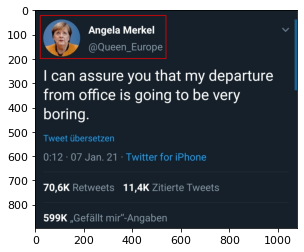

In [9]:
img = pl.read_image("example_images/0.jpg")
profile_pic_detection = detcs.return_model("profile_pic")

result = profile_pic_detection(img)
result = tweet.detection_result_to_numpy(result)
vis = tweet.visualize_detection_result(img, result)

pl.show_image(vis)

The code snipped above illustrates the process of fetching a loaded model from the detectos object and using it for a detection. If you want to learn more about Pluto's build-in detection models, run the snipped again but change the model name from "profile_pic" to "text_row" or "words" and see what happens.

### Conclusion

I hope this introduction gives you a first overview of how Pluto works. If you have more questions, feature requests, or you stumbled across a bug, please feel free to open a new issue or contact me on Twitter (@malikpaetzold).
kind regards :)